<a href="https://colab.research.google.com/github/aaravomega/Trip_price_prediction-using-ml/blob/main/Trip_price_prediction_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [8]:
# datasets of six major cities are there, other cities will be added in the future
df = pd.read_csv("/content/Clean_Dataset.csv")
Bangalore = pd.read_csv("/content/bangalore.csv")
Chennai = pd.read_csv("/content/chennai.csv")
Delhi = pd.read_csv("/content/delhi.csv")
Hyderabad = pd.read_csv("/content/hyderabad.csv")
Kolkata = pd.read_csv("/content/kolkata.csv")
Mumbai = pd.read_csv("/content/mumbai.csv")
cabfare = pd.read_csv("/content/cabprice.csv")
print("number of rows and columns in the flight dataset",df.shape)

number of rows and columns in the flight dataset (300153, 12)


In [9]:
#Extracting relevant rows
df = df[df['stops'] == 'zero']
df = df[df['class'] == 'Economy']

df.reset_index(drop=True, inplace=True)
cdf = df[['source_city','departure_time','arrival_time','destination_city','days_left','price']]

In [10]:
#Creating a dataframe for each unique trip
unique_combinations = df[['source_city', 'destination_city']].drop_duplicates()

trip_dataframes = {}

for index, row in unique_combinations.iterrows():
    source_city = row['source_city']
    destination_city = row['destination_city']

    trip_df = df[(df['source_city'] == source_city) & (df['destination_city'] == destination_city)].copy()

    trip_df.reset_index(drop=True, inplace=True)

    trip_key = f"{source_city}_to_{destination_city}"
    trip_dataframes[trip_key] = trip_df

# trip_delhi_to_mumbai = trip_dataframes['Delhi_to_Mumbai']

In [11]:
#inputs from user

source_city_input = input("Enter the source city: ").lower().capitalize()
destination_city_input = input("Enter the destination city: ").lower().capitalize()
days_left_input = float(input("Enter the number of days till the start date of your trip:"))
rating_input = float(input("Enter the number of stars you want your hotel to be:"))
star_rating_input = float(input("Enter the minimum user rating you want your hotel to have(0-5):"))
lengthoftrip_input = float(input("Enter the number of days the trip will last for:"))

Enter the source city: Delhi
Enter the destination city: Bangalore
Enter the number of days till the start date of your trip:9
Enter the number of stars you want your hotel to be:3
Enter the minimum user rating you want your hotel to have(0-5):4
Enter the number of days the trip will last for:4


In [12]:
trip_key_input = f"{source_city_input}_to_{destination_city_input}"

if trip_key_input in trip_dataframes:
    print(trip_dataframes[trip_key_input])
    ccdf = trip_dataframes[trip_key_input]
    msk = np.random.rand(len(ccdf)) < 0.8
    train = ccdf[msk]
    test = ccdf[~msk]

    regr = RandomForestRegressor()

    # Train the model
    train_x = np.asanyarray(train[['days_left']])
    train_y = np.asanyarray(train[['price']])
    regr.fit(train_x, train_y)

else:
    print("No data available for the specified trip.")

days_tillend = days_left_input + lengthoftrip_input
predicted_price_going = regr.predict(np.array([[days_left_input]]))
predicted_price_returning = regr.predict(np.array([[days_tillend]]))

      Unnamed: 0   airline   flight source_city departure_time stops  \
0           9982  SpiceJet   SG-191       Delhi  Early_Morning  zero   
1           9983   AirAsia  I5-1529       Delhi        Morning  zero   
2           9984   Vistara   UK-815       Delhi        Morning  zero   
3           9985   Vistara   UK-801       Delhi        Morning  zero   
4           9986   Vistara   UK-819       Delhi      Afternoon  zero   
...          ...       ...      ...         ...            ...   ...   
1590       20066    Indigo   6E-654       Delhi        Evening  zero   
1591       20067    Indigo  6E-2015       Delhi        Evening  zero   
1592       20068  SpiceJet   SG-197       Delhi        Evening  zero   
1593       20069  GO_FIRST   G8-113       Delhi  Early_Morning  zero   
1594       20070  GO_FIRST   G8-119       Delhi          Night  zero   

     arrival_time destination_city    class  duration  days_left  price  
0         Morning        Bangalore  Economy      2.50        

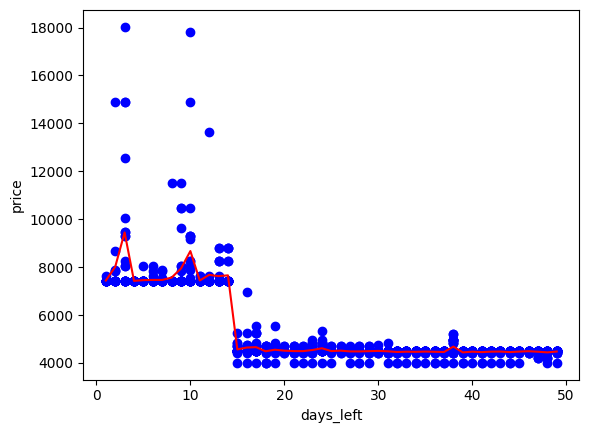

In [13]:
plt.scatter(train.days_left, train.price, color='blue')
# Predict prices
predicted_prices = regr.predict(train_x)
# Plot regression line
plt.plot(train_x, predicted_prices, '-r')
plt.xlabel("days_left")
plt.ylabel("price")
plt.show()

In [14]:
if destination_city_input == 'Bangalore':
    city = Bangalore
elif destination_city_input == 'Chennai':
    city = Chennai
elif destination_city_input == 'Delhi':
    city = Delhi
elif destination_city_input == 'Hyderabad':
    city = Hyderabad
elif destination_city_input == 'Kolkata':
    city = Kolkata
elif destination_city_input == 'Mumbai':
    city = Mumbai
else:
    print("City not found in the dataset.")

print(city)

                                            Hotel Name  Rating  \
0                                   The Park Bangalore     3.9   
1    Keys Select by Lemon Tree Hotels, Whitefield, ...     4.0   
2              ITC Windsor - A Luxury Collection Hotel     4.4   
3             Lemon Tree Premier Ulsoor Lake Bangalore     4.0   
4    Keys Select by Lemon Tree Hotels, Hosur Road, ...     4.0   
..                                                 ...     ...   
96                 Shravanthi Sarovar Portico JP Nagar     3.6   
97                       Vivanta Bengaluru, Whitefield     4.3   
98                          Melange Astris\r\nLike a 3     4.1   
99                                   Octave Church Inn     3.5   
100                         Mastiff Infantry Bengaluru     4.0   

    Rating Description  Reviews  Star Rating              Location  \
0            Very Good   4187.0          5.0                Ulsoor   
1            Very Good   2201.0          4.0           Brookefield 

In [15]:
city.dropna(inplace=True)
city['average'] = city[['Rating', 'Star Rating']].mean(axis=1)

mskhotel = np.random.rand(len(city)) < 0.8
trainhotel = city[mskhotel]
testhotel = city[~mskhotel]
# remove commas
trainhotel['Price'] = trainhotel['Price'].str.replace(',', '').astype(float)
testhotel['Price'] = testhotel['Price'].str.replace(',', '').astype(float)

In [16]:
# detect and handle outliers
def handle_outliers(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = np.abs(z_scores) > threshold
    data[outliers] = np.nan
    data.fillna(data.median(), inplace=True)
    return data

# handle outliers in the training data
trainhotel[['Rating', 'Star Rating', 'Price']] = handle_outliers(trainhotel[['Rating', 'Star Rating', 'Price']])

# model
regrhotel = linear_model.LinearRegression()
x = np.asanyarray(trainhotel[['Rating', 'Star Rating']])
y = np.asanyarray(trainhotel['Price'])
regrhotel.fit(x, y)

# predict using multiple linear regression
y_hat = regrhotel.predict(np.asanyarray(testhotel[['Rating', 'Star Rating']]))

#mse = np.mean((y_hat - testhotel['Price']) ** 2)
rsquared = regrhotel.score(np.asanyarray(testhotel[['Rating', 'Star Rating']]), testhotel['Price'])
print("Variance score (R-squared) - Linear Regression:", rsquared)

Variance score (R-squared) - Linear Regression: -4.394945486827183


In [17]:
def predict_price(rating, star_rating):
    y_hat = regrhotel.predict([[rating, star_rating]])
    return y_hat[0]

predicted_price_hotel = predict_price(rating_input, star_rating_input)
print("Predicted Price:", predicted_price_hotel)
predicted_fullprice_hotel = predicted_price_hotel * lengthoftrip_input

Predicted Price: 7625.451035781548


In [18]:
city.dropna(inplace=True)

# process the distance column so it can be used
def converted_distance(distance):
    if isinstance(distance, str):
        if 'km' in distance:
            return float(distance.replace(' km', ''))
        elif 'm' in distance:
            return float(distance.replace(' m', '')) / 1000  # Convert meters to kilometers
        else:
            return float(distance)
    else:
        return distance

city['Distance to Landmark'] = city['Distance to Landmark'].apply(converted_distance)

features = city[['Rating', 'Star Rating']]
target = city['Distance to Landmark']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

predicted_distance = rf_regressor.predict([[rating_input, star_rating_input]])

print("Predicted distance to the landmark:", predicted_distance[0])


Mean Squared Error: 0.38527837143680643
Predicted distance to the landmark: 1.6814199999999988


In [19]:
cabfare.replace({'\?': ''}, regex=True, inplace=True)

# converting to float
columns_to_convert = ['Taxi Start (Normal Tariff)', 'Taxi 1km (Normal Tariff)', 'Taxi 1hour waiting (Normal Tariff)']
cabfare[columns_to_convert] = cabfare[columns_to_convert].astype(float)

def calculate_taxi_fare(city, distance):
    for index, row in cabfare.iterrows():
        if row['City'] == city:
            start_fare = float(row['Taxi Start (Normal Tariff)'])
            per_km_fare = float(row['Taxi 1km (Normal Tariff)'])
            fare = start_fare + (per_km_fare * distance)
            return fare
    return "City not found in dataset"

fare = calculate_taxi_fare(destination_city_input, predicted_distance[0])
print(fare)


150.44259999999997


In [20]:
print("Price of flight while going: {:.2f}".format(predicted_price_going[0]))
print("Price of flight while returning: {:.2f}".format(predicted_price_returning[0]))
print("Price of hotel stay for {} nights: {:.2f}".format(lengthoftrip_input, predicted_fullprice_hotel))
total_fare = fare * 2
print("Price of cabs(to and from the airport to hotel): {:.2f}".format(total_fare))

full_total_price = predicted_price_going[0] + predicted_price_returning[0] + predicted_fullprice_hotel + total_fare
print("Total expense of the trip: {:.2f}".format(full_total_price))

Price of flight while going: 7940.88
Price of flight while returning: 7623.84
Price of hotel stay for 4.0 nights: 30501.80
Price of cabs(to and from the airport to hotel): 300.89
Total expense of the trip: 46367.40
